### Mathematical Models for Time Series Example 1.2
A white noise process consists of independent and identically distributed random variables $\{W_1,W_2,\dots\}$ where each $W_i$ has mean $0$ and variance $\sigma^2$.

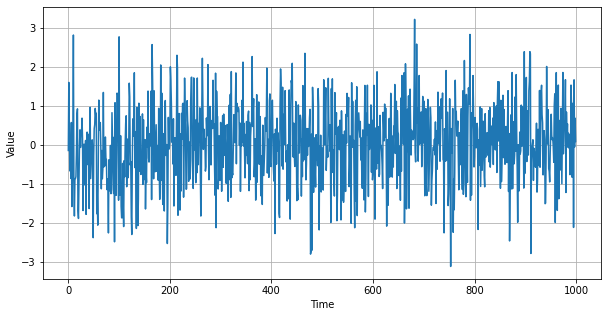

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# White noise signal
w = np.random.normal(size=1000)

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(w)
ax.grid()
plt.xlabel("Time")
plt.ylabel("Value")

plt.show()

If in addition the individual random variables $W_i$ are normally distributed, then the process is called _Gaussian_ white noise. These models are used to describe noise in engineering applications. The term _white_ is chosen in analogy to white light and indicates that all possible periodic oscillations are present in a time series originating from a white noise process with equal strength.

### Mathematical Models for Time Series Example 1.3
If we apply a sliding window filter to the white noise process $\{W_1,W_2,\dots\}$ in the previous example of white noise we obtain a _moving average_ process. E.g. if we choose the window length to be $3$, we obtain
$$
V_i = \frac{1}{3}(W_{i-1} + W_i + W_{i+1}).
$$
We choose $V_1 = W_1$ and $V_2 = 0.5(W_1 + W_2)$. The resulting process is smoother, i.e. the higher order oscillations are smoothed out. 
In `Python` a sliding window can be achieved using `.rolling()`, the mean can be found with `.mean()`.

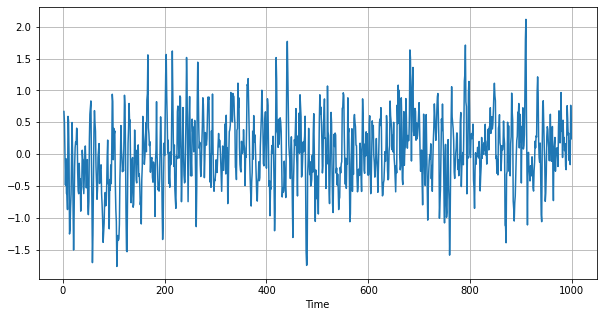

In [2]:
import pandas as pd

# Convert to DataFrame
w = pd.DataFrame(w)
# Filter with window = 3
v = w.rolling(window=3).mean()

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(v)
ax.grid()
plt.xlabel("Time")

plt.show()

### Mathematical Models for Time Series Example 1.4
We consider again the white noise process $\{W_1,W_2,\dots\}$ and recursively compute the following sequence
$$
X_i = 1.5 X_{i-1} - 0.9 X_{i-2} + W_i.
$$
In other words, the value of the process at time instance $i$ is modelled as a linear combination of the past two values plus some random component. Therefore this process is called *autoregressive*. The definition of the initial conditions is subtle, because the process will strongly depend on these. We will for the time being ignore the issue of initial conditions. 

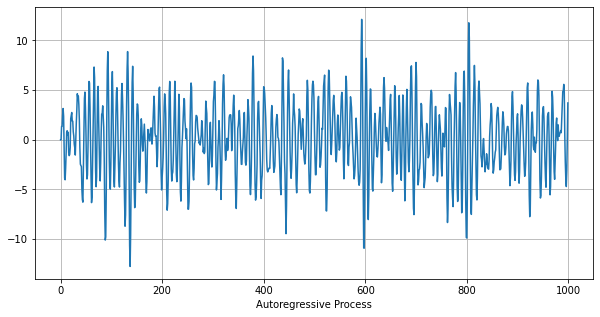

In [6]:
# Autoregressive filter:
ar = np.zeros(1000)
for i in range(2,1000):
    ar[i] = 1.5 * ar[i-1] - 0.9 * ar[i-2] + w.iloc[i]
    
# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(ar)
ax.grid()
plt.xlabel("Autoregressive Process")

plt.show()

The figure shows a realization of the autoregressive process above. The oscillatory behaviour becomes clearly visible. Another interpretation of the autoregressive process above is via differential equations. The finite difference scheme for the second order equation
$$
\ddot x + 2\delta \dot x + \omega_0^2 x = W(t) 
$$
is given by
$$
\frac{x_{i-2} - 2x_{i-1} + x_{i}}{\Delta t^2} + 2\delta\frac{x_{i} - x_{i-1}}{\Delta t} + \omega_0^2 x_{i} = W_i
$$
Here $\delta$ is the damping term and $\omega_0$ the frequency of the homogeneous equation. Setting $\Delta t = 1$, $\omega_0^2 = 0.4$ and $\delta = 0.05$ gives -- after some rearrangements -- the autoregressive process above. Hence it can be seen as a *harmonic oscillator with random input*. The wave length of the exact solution is $T = 2\pi \ \omega_0 \approx 10.0$ which matches the previous situation pretty well. 